In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

     cntry  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet
0       CH    3.0      3.0     10.0     5.0    8.0      5.0
1       CH    6.0      5.0      7.0     5.0    9.0      3.0
2       CH    1.0      8.0      8.0     8.0    7.0      6.0
3       CH    4.0      6.0      6.0     7.0   10.0      6.0
4       CH    5.0      6.0      7.0     5.0    8.0      7.0
5       CH    4.0      6.0      7.0     3.0    8.0      7.0
6       CH    3.0      0.0      5.0     2.0    0.0      2.0
7       CH    2.0      4.0      5.0     3.0   10.0      5.0
8       CH    2.0      8.0      8.0     8.0    9.0      6.0
9       CH    4.0      4.0      4.0     8.0    7.0      4.0
10      CH    1.0      6.0      7.0     7.0    9.0      5.0
11      CH    4.0      5.0      7.0     7.0    7.0      5.0
12      CH    4.0      7.0      7.0     4.0    9.0      6.0
13      CH    2.0      1.0      9.0     7.0    8.0      4.0
14      CH    4.0      4.0      5.0     3.0    8.0      1.0
15      CH    5.0      4.0      5.0     

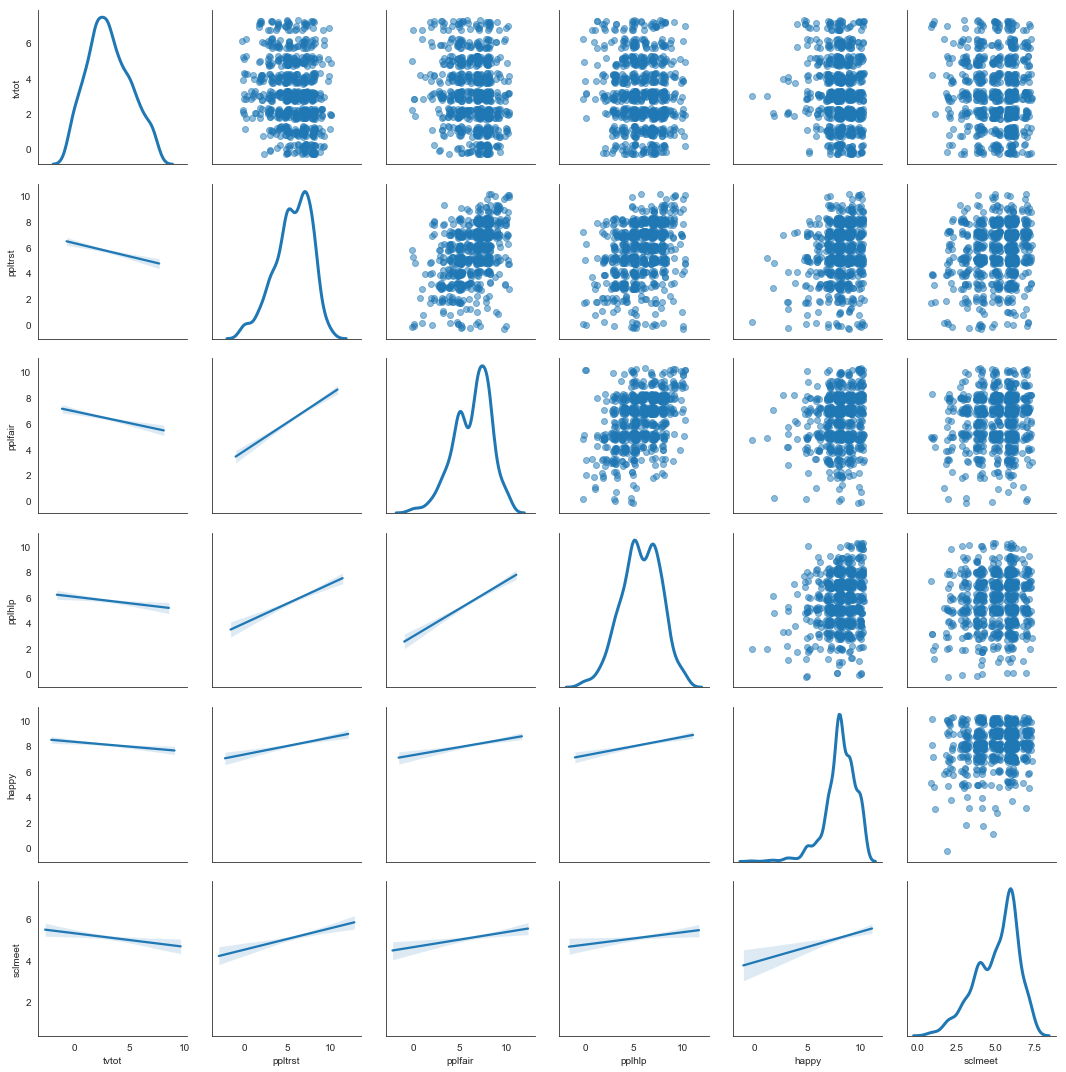

In [2]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier
sns.set_style('white')

df = pd.read_csv('essdata_thinkful.csv')

# Take a subset of the data to make plots clearer
df_czch = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['cntry', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
]

print(df_czch)

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another.  To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot
df_jittered = df_czch.loc[:, 'tvtot':'sclmeet'].dropna()
# Making the random noise
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univarite distributions of the variables
g.map_diag(sns.kdeplot, lw=3)
plt.show()

            tvtot   ppltrst   pplfair    pplhlp     happy   sclmeet
tvtot    1.000000 -0.240432 -0.233280 -0.176517 -0.265293 -0.144105
ppltrst -0.240432  1.000000  0.605589  0.500378  0.297432  0.148949
pplfair -0.233280  0.605589  1.000000  0.532927  0.275204  0.105886
pplhlp  -0.176517  0.500378  0.532927  1.000000  0.269627  0.109383
happy   -0.265293  0.297432  0.275204  0.269627  1.000000  0.244289
sclmeet -0.144105  0.148949  0.105886  0.109383  0.244289  1.000000


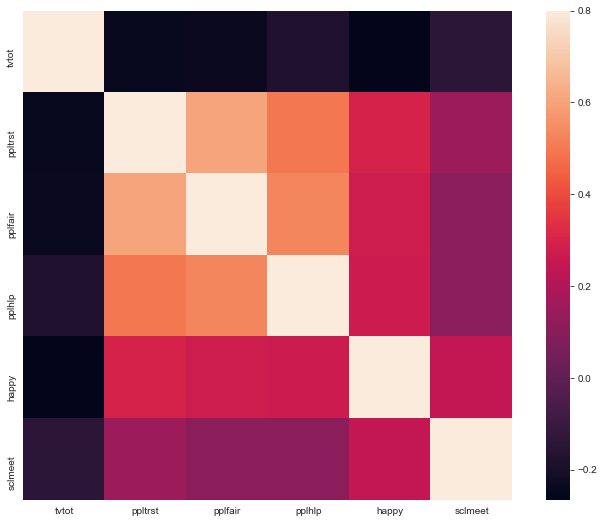

In [3]:
# Make the correlation matrix
corrmat = df_czch.corr()
print(corrmat)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like

     cntry variable  value
0       CH    tvtot    3.0
1       CH    tvtot    6.0
2       CH    tvtot    1.0
3       CH    tvtot    4.0
4       CH    tvtot    5.0
5       CH    tvtot    4.0
6       CH    tvtot    3.0
7       CH    tvtot    2.0
8       CH    tvtot    2.0
9       CH    tvtot    4.0
10      CH    tvtot    1.0
11      CH    tvtot    4.0
12      CH    tvtot    4.0
13      CH    tvtot    2.0
14      CH    tvtot    4.0
15      CH    tvtot    5.0
16      CH    tvtot    4.0
17      CH    tvtot    2.0
18      CH    tvtot    0.0
19      CH    tvtot    2.0
20      CH    tvtot    7.0
21      CH    tvtot    1.0
22      CH    tvtot    2.0
23      CH    tvtot    2.0
24      CH    tvtot    0.0
25      CH    tvtot    0.0
26      CH    tvtot    2.0
27      CH    tvtot    0.0
28      CH    tvtot    2.0
29      CH    tvtot    7.0
...    ...      ...    ...
8556    CZ  sclmeet    5.0
8557    CZ  sclmeet    3.0
8558    CZ  sclmeet    3.0
8559    CZ  sclmeet    6.0
8560    CZ  sclmeet    3.0
8

C:\Users\micsa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\micsa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


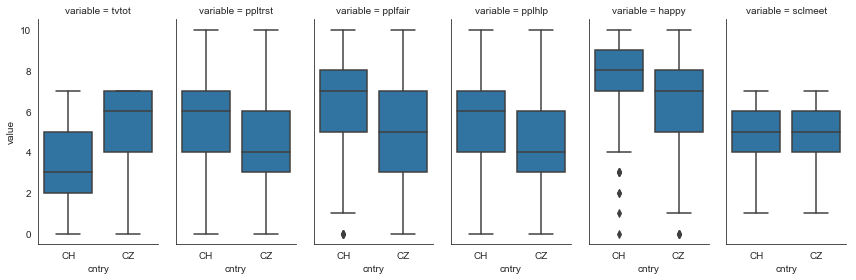

       happy                                               pplfair            \
       count      mean       std  min  25%  50%  75%   max   count      mean   
cntry                                                                          
CH     770.0  8.088312  1.437920  0.0  7.0  8.0  9.0  10.0   770.0  6.350649   
CZ     646.0  6.770898  2.053582  0.0  5.0  7.0  8.0  10.0   649.0  4.959938   

      ...  sclmeet       tvtot                                               
      ...      75%  max  count      mean       std  min  25%  50%  75%  max  
cntry ...                                                                    
CH    ...      6.0  7.0  772.0  3.141192  1.913706  0.0  2.0  3.0  5.0  7.0  
CZ    ...      6.0  7.0  653.0  5.142420  1.851775  0.0  4.0  6.0  7.0  7.0  

[2 rows x 48 columns]
tvtot
Ttest_indResult(statistic=19.962218108197227, pvalue=2.321576398582079e-78)
ppltrst
Ttest_indResult(statistic=-10.928900558029875, pvalue=9.394029017549828e-27)
pplfair
Ttest_indRe

In [5]:
# Plot all the variables with boxplots for each country

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately
df_long = df_czch
df_long = pd.melt(df_long, id_vars=['cntry'])
print(df_long)

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "cntry", "value")
plt.show()

# Descriptive statistics by group
print(df_czch.groupby('cntry').describe())

# Test whether group differences are significant
for col in df_czch.loc[:, 'tvtot':'sclmeet'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czch[df_czch['cntry'] == 'CZ'][col].dropna(),
        df_czch[df_czch['cntry'] == 'CH'][col].dropna()
    ))

partner_cat  Does not live with partner  Lives with partner
cntry                                                      
CH                                  270                 503
CZ                                  284                 372
Power_divergenceResult(statistic=96.39958012596222, pvalue=9.236593586645439e-21)


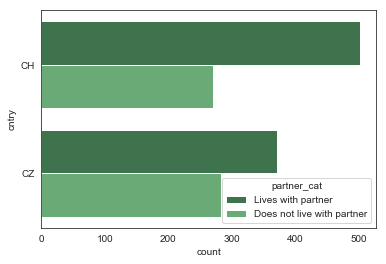

In [6]:
# Add a second categorial variable
df_2cat = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] ==6),
    ['cntry','partner']
]
df_2cat.head(10)

# Create a text variable so that output is easier to interpret
df_2cat['partner_cat'] = None
df_2cat.loc[df_2cat['partner'] == 1, 'partner_cat'] = 'Lives with partner'
df_2cat.loc[df_2cat['partner'] == 2, 'partner_cat'] = 'Does not live with partner'

# Plot counts for each combination of levels
sns.countplot(y="cntry", hue="partner_cat", data=df_2cat, palette="Greens_d")

# Table of counts
counttable = pd.crosstab(df_2cat['cntry'], df_2cat['partner_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square 
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population
print(stats.chisquare(counttable, axis=None))